In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import timedelta

c:\users\ryana\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("listings.csv.gz", compression="gzip")
df.to_csv("airbnb.csv")

c:\users\ryana\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

20677

In [4]:
#looking at the number of features
len(df.columns)

106

In [5]:
pd.set_option('display.max_rows',len(df.dtypes))
print(df.dtypes)
# for manual inspection of data types to the actual data

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

In [6]:
pd.set_option("display.max_columns",len(df.columns))
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,15,15,3.0,15.0,today,t,8,18,43,89,2019-08-09,267,30,2009-03-30,2019-08-05,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,NaN,f,https://a0.muscach

In [7]:
# targets: availability and price
targets = df[["price","availability_30","availability_60","availability_90","availability_365"]]

# initial thoughts on data groupings:
    # urls
urls = df[["id","listing_url","picture_url","host_url","host_thumbnail_url","host_picture_url"]]
    # descriptions from host
        # possible sentiment analysis
descriptions = df[["id","name","summary","space","description","neighborhood_overview","notes","transit","access","interaction","house_rules","host_about"]]
    # ids
        # license
ids = df[["id","scrape_id","host_id"]]
    # numeric
        # host_listings_count
        # host_total_listings_count
        # host_acceptance_rate
        # host_response_rate
        # accommodates
        # bathrooms
        # bedrooms
        # beds
        # square_feet
        # guests_included
        # weekly_price
        # monthly_price
        # security_deposit
        # cleaning_fee
        # availability_30
        # availability_60
        # availability_90
        # availability_365
        # price
        # number_of_reviews
        # number_of_reviews_ltm
        # calculated_host_listings_count
        # calculated_host_listings_count_entire_homes
        # calculated_host_listings_count_private_rooms
        # calculated_host_listings_count_shared_rooms
        # reviews_per_month
        # review_scores_rating
        # review_scores_accuracy
        # review_scores_cleanliness
        # review_scores_checkin
        # review_scores_communication
        # review_scores_location
        # review_scores_value
    # text fields from guests
    # categorical
        # property_type
        # room_type
        # bed_type
        # host_is_superhost
        # amenities (separation complete)
        # host_verifications (separation complete)
        # host_has_profile_pic
        # host_identity_verified
        # host_response_time (possibly date-oriented)
        # cancellation_policy
            # depending on how this is structured, could be split into 2 int fields: min & max cancellation days allowed
        # is_location_exact (also in location-oriented)
    # location-oriented
        # is_location_exact (also in categorical)
        # host_neighbourhood
        # neighborhood
        # street
        # neighborhood_cleansed
        # city
        # state
        # zipcode
        # market
        # smart location
        # latitude
        # longitude
    # date-oriented
        # calendar_last_scraped
        # first_review
        # last_review
        # last_scraped
        # host_since
        # calendar_updated

In [8]:
df.select_dtypes(include=['float64','int']).columns

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [9]:
# to be dropped (completed):
    # thumbnail_url
    # medium_url
    # xl_picture_url
        # is float64, meaning all should be NaN or numbers, thus not actually urls
    # neighborhood_group_cleansed
        # is float64, meaning all should be NaN or numbers, should be categorical?
    # host_name
        # this is of no use to analysis unless gender can be determined
            # even then, it's not that informational
    # experiences_offered
        # only value is 'none'
    # some location-based features
    # country_code
    # jurisdiction_names

In [10]:
# conversions needed (completed):
    # host_is_superhost --> boolean
    # host_has_profile_pic --> boolean
    # host_identity_verified --> boolean
    # is_location_exact --> boolean
    # has_availability --> boolean
    # requires_license --> boolean
    # license? --> boolean
    # require_guest_profile_picture --> boolean
    # require_guest_phone_verification --> boolean
    # instant_bookable --> boolean
    # is_business_travel_ready --> boolean
    
    # host_response_rate --> float    
    # price --> float
    # weekly_price --> float
    # monthly_price --> float
    # security_deposit --> float
    # cleaning_fee --> float
    # extra_people --> float
    
    # review_scores_rating --> divide by max
    # review_scores_accuracy --> divide by max
    # review_scores_cleanliness --> divide by max
    # review_scores_checkin --> divide by max
    # review_scores_communication --> divide by max
    # review_scores_location --> divide by max
    # review_scores_value --> divide by max
    
    # last_scraping --> datetime
    # host_since --> datetime
    # calendar_last_scraped --> datetime
    # first_review --> datetime
    # last_review --> datetime
    # calendar_updated --> datetime
    
    # amenities --> split into many true/false columns
    
    # (to be dropped) experiences_offered --> np.NaN for none

In [11]:
# location-oriented column inspection
for col in df[["is_location_exact",
              "host_neighbourhood",
              "neighbourhood",
              "street",
              "neighbourhood_cleansed",
              "city",
              "state",
              "zipcode",
              "market",
              "smart_location",
              "latitude",
              "longitude"]]:
    print(df[col].isnull().sum(), df[col].name)

0 is_location_exact
5937 host_neighbourhood
831 neighbourhood
0 street
0 neighbourhood_cleansed
4 city
219 state
886 zipcode
40 market
0 smart_location
0 latitude
0 longitude


In [12]:
# boolean conversions inspection
for col in df[['host_is_superhost',
               'host_has_profile_pic',
               'host_identity_verified',
               'is_location_exact',
               'has_availability',
               'requires_license',
               'license',
               'require_guest_profile_picture',
               'require_guest_phone_verification',
               'instant_bookable',
               'is_business_travel_ready']]:
    print(df[col].name, df[col].unique())

host_is_superhost ['t' 'f' nan]
host_has_profile_pic ['t' nan 'f']
host_identity_verified ['f' 't' nan]
is_location_exact ['f' 't']
has_availability ['t']
requires_license ['f']
license [nan 'NL857416819B01' 'NL825517485B01' '855596338B01' 'NL854649426B01'
 'CITY TAX' 'NL853952590B01' 'GB 709304057']
require_guest_profile_picture ['f' 't']
require_guest_phone_verification ['f' 't']
instant_bookable ['t' 'f']
is_business_travel_ready ['f']


### Upon inspecting the unique values above, I notice a few columns have only 1 unique value, and license is not boolean. 
#### I have updated the conversions needed and data groupings sections to reflect this information. 
#### Requires license should be dropped in favor of license NaN values. That 'CITY TAX' value should be looked into as well.
#### The conversions are performed below:

In [13]:
# boolean conversions
for col in df[['host_is_superhost',
               'host_has_profile_pic',
               'host_identity_verified',
               'is_location_exact',
               'has_availability',
               'requires_license',
#                'license',
               'require_guest_profile_picture',
               'require_guest_phone_verification',
               'instant_bookable',
               'is_business_travel_ready']]:
    if len(df[col].unique()) != 1:
        df.loc[df[col]=='t',col] = True
        df.loc[df[col]=='f',col] = False
    else:
        del df[col]

In [14]:
# float conversions inspection
for col in df[['host_response_rate',     
               'price',
               'weekly_price', 
               'monthly_price', 
               'security_deposit',
               'cleaning_fee',
               'extra_people']]:
    print(df[col].name, df[col].unique())

host_response_rate ['100%' nan '50%' '0%' '33%' '60%' '90%' '58%' '88%' '83%' '75%' '89%'
 '80%' '67%' '86%' '44%' '70%' '98%' '96%' '94%' '78%' '71%' '65%' '97%'
 '93%' '17%' '82%' '66%' '57%' '40%' '56%' '10%' '79%' '46%' '95%' '25%'
 '84%' '29%' '91%' '73%' '64%' '20%' '14%' '92%' '21%' '63%' '43%' '85%'
 '69%' '30%' '99%' '81%' '61%' '76%' '59%' '87%' '77%' '55%' '52%' '13%'
 '38%' '51%' '31%' '68%']
price ['$59.00' '$80.00' '$125.00' '$150.00' '$75.00' '$55.00' '$219.00'
 '$145.00' '$159.00' '$210.00' '$100.00' '$349.00' '$240.00' '$140.00'
 '$350.00' '$220.00' '$120.00' '$115.00' '$90.00' '$87.00' '$60.00'
 '$86.00' '$222.00' '$250.00' '$149.00' '$112.00' '$235.00' '$109.00'
 '$750.00' '$170.00' '$189.00' '$450.00' '$108.00' '$175.00' '$105.00'
 '$70.00' '$135.00' '$95.00' '$249.00' '$45.00' '$98.00' '$40.00'
 '$165.00' '$97.00' '$99.00' '$259.00' '$52.00' '$89.00' '$79.00' '$74.00'
 '$230.00' '$50.00' '$160.00' '$225.00' '$129.00' '$284.00' '$180.00'
 '$400.00' '$114.00' '$265.0

### Upon inspection, I notice my chosen columns are prices, with 1 exception.
#### Commas, dollar signs, and percentages
### After converting dollars, I should look into them being represented as integers to save memory.
#### Perhaps they are integers by design.

In [15]:
# using https://stackoverflow.com/questions/8421922/how-do-i-convert-a-currency-string-to-a-floating-point-number-in-python
# as a reference
# I determined that if I had more time, I might perform some currency conversion formula for non-US figures
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
print(type(locale.atof('$1000.45'.strip("$"))),locale.atof('$1000.45'.strip("$")))

<class 'float'> 1000.45


In [16]:
# float conversions
for col in df[['price',
               'weekly_price', 
               'monthly_price', 
               'security_deposit',
               'cleaning_fee',
               'extra_people']]:
    df[col] = df[col].apply(lambda value: locale.atof(str(value).strip("$")) if value != np.nan else np.nan)

In [17]:
df['host_response_rate'] = pd.to_numeric(df["host_response_rate"].str.replace("%",""))/100

In [18]:
# divide by max conversions
for col in df[["review_scores_rating",
               "review_scores_accuracy",
               "review_scores_cleanliness",
               "review_scores_checkin",
               "review_scores_communication",
               "review_scores_location",
               "review_scores_value"]]:
    df[col] = df[col]/df[col].max()

In [19]:
# datetime conversions inspection
for col in df[["last_scraped",
               "host_since",
               "calendar_last_scraped",
               "first_review",
               "last_review"]]:
    # I want to see the number of unique values, how many null values, and peek at the data
    print(len(pd.to_datetime(df[col]).unique()),
          "\n",
          len(pd.to_datetime(df[col]).loc[df[col].isnull()]),
          "\n",
          pd.to_datetime(df[col]))

3 
 0 
 0       2019-08-09
1       2019-08-09
2       2019-08-09
3       2019-08-09
4       2019-08-09
           ...    
20672   2019-08-09
20673   2019-08-09
20674   2019-08-09
20675   2019-08-09
20676   2019-08-09
Name: last_scraped, Length: 20677, dtype: datetime64[ns]
3047 
 12 
 0       2008-09-24
1       2009-12-02
2       2009-11-20
3       2010-03-23
4       2010-05-13
           ...    
20672   2013-05-25
20673   2019-08-08
20674   2013-10-04
20675   2017-05-25
20676   2015-10-03
Name: host_since, Length: 20677, dtype: datetime64[ns]
3 
 0 
 0       2019-08-09
1       2019-08-09
2       2019-08-09
3       2019-08-09
4       2019-08-09
           ...    
20672   2019-08-09
20673   2019-08-09
20674   2019-08-09
20675   2019-08-09
20676   2019-08-09
Name: calendar_last_scraped, Length: 20677, dtype: datetime64[ns]
2277 
 2593 
 0       2009-03-30
1       2010-03-02
2       2018-01-21
3       2012-01-09
4       2010-08-22
           ...    
20672          NaT
20673          NaT
2

#### Within last_scraped and calendar_last_scraped, I see 3 unique values, no null values, and mostly the date 2019-08-09

In [20]:
# datetime conversions
for col in df[["last_scraped",
               "host_since",
               "calendar_last_scraped",
               "first_review",
               "last_review"]]:
    df[col] = pd.to_datetime(df[col])

#### According to the calendar_updated column, that is today's date in terms of the dataset.

In [21]:
df['calendar_updated'].unique()

array(['today', '3 days ago', '8 months ago', '5 months ago', 'yesterday',
       '3 weeks ago', '20 months ago', '6 weeks ago', 'a week ago',
       '1 week ago', '2 days ago', '10 months ago', '4 days ago',
       '6 months ago', '2 months ago', '22 months ago', '5 days ago',
       '5 weeks ago', '6 days ago', '15 months ago', '2 weeks ago',
       '23 months ago', '9 months ago', '4 weeks ago', '33 months ago',
       '31 months ago', '7 weeks ago', '3 months ago', '24 months ago',
       '4 months ago', '16 months ago', '40 months ago', '30 months ago',
       '17 months ago', '14 months ago', '13 months ago', '25 months ago',
       '21 months ago', '12 months ago', '18 months ago', '50 months ago',
       '44 months ago', '7 months ago', '42 months ago', '11 months ago',
       '35 months ago', '39 months ago', '43 months ago', '27 months ago',
       '28 months ago', 'never', '19 months ago', '29 months ago',
       '37 months ago', '26 months ago', '36 months ago', '32 months 

In [22]:
today = dt.datetime.strptime('2019-08-09','%Y-%m-%d')

In [23]:
def update_relative_calendar_values(value):
    # included years even though it is not included in the calendar values
    # future proofing attempt
    if value == 'today':
        return today
    elif value == 'never':
        return np.NaN
    elif value == 'yesterday':
        return today + relativedelta(days=-1)
    elif value == 'a month ago':
        return today + relativedelta(months=-1)
    elif value == 'a week ago':
        return today + relativedelta(weeks=-1)
    elif value == 'a year ago':
        return today + relativedelta(years=-1)
    else:
        to_be_subtracted = pd.to_numeric(int(value.split(" ")[0]))
        if 'days' in value:
            return today + relativedelta(days=-to_be_subtracted)
        elif 'week' in value:
            return today + relativedelta(weeks=-to_be_subtracted)
        elif 'month' in value:
            return today + relativedelta(months=-to_be_subtracted)
        elif 'year' in value:
            return today + relativedelta(years=-to_be_subtracted)

In [24]:
df['calendar_updated'] = df['calendar_updated'].apply(update_relative_calendar_values)

### The cancellation_policy and host_response_time ordinal values are best left for OneHotEncoder.

In [25]:
df['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible',
       'super_strict_30', 'super_strict_60', nan], dtype=object)

In [26]:
print(df['host_response_time'].unique())

['within an hour' nan 'within a day' 'a few days or more'
 'within a few hours']


In [27]:
# time to look into the { dictionary } columns: jurisdiction_names, amenities
print(df['jurisdiction_names'].name, "\n", df['jurisdiction_names'].unique(),"\n")
print(df['amenities'].name, df['amenities'].unique()[0],"\n")
print(df['host_verifications'].name, df['host_verifications'].unique()[0])

jurisdiction_names 
 ['{Amsterdam," NL Zip Codes 2"," Amsterdam"," NL"}' '{Amsterdam," NL"}'
 '{Amsterdam," NL Zip Codes 2"}' nan '{Amsterdam}'] 

amenities {Internet,Wifi,"Paid parking off premises","Buzzer/wireless intercom",Heating,Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Private entrance","Hot water","Bed linens","Extra pillows and blankets","Single level home","Garden or backyard","No stairs or steps to enter","Flat path to guest entrance","Well-lit path to entrance","No stairs or steps to enter","Accessible-height bed","No stairs or steps to enter","Host greets you","Handheld shower head","Paid parking on premises"} 

host_verifications ['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'governme

### jurisdiction_names data is covered by the other location columns

In [28]:
del df['jurisdiction_names']

### amenities and host_verification_methods needs to be broken down

In [29]:
amenities = []
for row in df['amenities'].str.replace("\"","").str.replace("{","").str.replace("}","").str.split(","):
    for item in row:
        amenities.append(item)
        
# used this to find problems in the replacements print(sorted(set(amenities)))
amenities = list(set(amenities))
# first element is a blank string
amenities = amenities[1:]

# there was 1 amenity that was split up incorrectly
for index, amenity in enumerate(amenities):
    string_needing_repair = "Wide clearance to shower, toilet"
    if amenity in string_needing_repair:
        amenities[index] = string_needing_repair

amenities = list(set(amenities))

# print(len(amenities)) # 123
for amenity in amenities:
#     print(amenity) # for the reader
    df[amenity] = False
    if amenity == "TV":
        df.loc[df['amenities'].str.contains(amenity+","), amenity] = True
    else:
        df.loc[df['amenities'].str.contains(amenity), amenity] = True
# the translation missing features don't need to be removed
# if they prove to be meaningful, find a translator

c:\users\ryana\appdata\local\programs\python\python37\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [30]:
verification_methods = []
for row in df['host_verifications'].str.replace(" ","")\
                                   .str.replace("[","")\
                                   .str.replace("]","")\
                                   .str.split(","):
    for item in row:
        verification_methods.append(item)
        
# first element is blank string
# second element is 'None', will be replaced
verification_methods = list(sorted(set(verification_methods))[1:])
verification_methods.remove('None')
verification_methods
# the single quotes are present by design

["'email'",
 "'facebook'",
 "'google'",
 "'government_id'",
 "'identity_manual'",
 "'jumio'",
 "'kba'",
 "'manual_offline'",
 "'manual_online'",
 "'offline_government_id'",
 "'phone'",
 "'reviews'",
 "'selfie'",
 "'sent_id'",
 "'sesame'",
 "'sesame_offline'",
 "'weibo'",
 "'work_email'",
 "'zhima_selfie'"]

In [31]:
for verification_method in verification_methods:
    df[verification_method.replace("\'","")] = False
    df.loc[(df['host_verifications'].str.contains(verification_method)) & (~df['host_verifications'].isna()), verification_method.replace("\'","")] = True
    
df.loc[df['host_verifications'].str.contains('None'),'host_verifications'] = np.NaN
del df['host_verifications']

In [32]:
# finding missing values
df.isnull().sum()

id                 0
listing_url        0
scrape_id          0
last_scraped       0
name              35
                  ..
sesame             0
sesame_offline     0
weibo              0
work_email         0
zhima_selfie       0
Length: 244, dtype: int64

In [33]:
# In real life, I would examine the missing values, and if the len() of that changes
# I would convert the none value to np.NaN, but saving computation time, 
# I just need to delete the column
print(df['experiences_offered'].unique())
del df['experiences_offered']

['none']


In [34]:
# upon inspecting no gender columns, pulling information from this column would require guessing gender by name
del df['host_name']

In [35]:
df.drop(df.columns[df.isnull().all()], axis=1, inplace=True)

In [36]:
for col in df[["number_of_reviews",
                "number_of_reviews_ltm",
                "calculated_host_listings_count",
                "calculated_host_listings_count_entire_homes",
                "calculated_host_listings_count_private_rooms",
                "calculated_host_listings_count_shared_rooms",
                "reviews_per_month",
                "review_scores_rating",
                "review_scores_accuracy",
                "review_scores_cleanliness",
                "review_scores_checkin",
                "review_scores_communication",
                "review_scores_location",
                "review_scores_value",
                "host_listings_count",
                "host_total_listings_count",
                "host_response_rate",
                "accommodates",
                "bathrooms",
                "bedrooms",
                "beds",
                "square_feet",
                "guests_included",
                "weekly_price",
                "monthly_price",
                "security_deposit",
                "cleaning_fee",
                "availability_30",
                "availability_60",
                "availability_90",
                "availability_365"]]:
    if len(df.loc[df[col].isna()]) != 0:
        print(len(df.loc[df[col].isna()]), df[col].name)


2593 reviews_per_month
2816 review_scores_rating
2827 review_scores_accuracy
2825 review_scores_cleanliness
2837 review_scores_checkin
2830 review_scores_communication
2835 review_scores_location
2835 review_scores_value
12 host_listings_count
12 host_total_listings_count
8541 host_response_rate
6 bathrooms
8 bedrooms
8 beds
20291 square_feet
18086 weekly_price
19269 monthly_price
6202 security_deposit
3721 cleaning_fee


### Rows with Reviews equal to NaN should be deleted. Many of the owners are hardly using AirBnB.
### Listing counts with NaN should be at least 1. Must check against host_id grouping.
### Cleaning Fee and Security Deposit NaN should be 0
### Square Feet should be deleted. Too many missing values. Many hosts fake these numbers.
### Bedrooms, Bathrooms, Beds NaN values are so minimal I'm going to remove them. With more time I would check descriptions for "studio" or "beds" and inspect.
### Weekly Price and Monthly Price NaN values I'm going to set equal to the price * days

In [37]:
# to show the number of review-less listings
print(df.loc[(df["review_scores_rating"].isna()) |
             (df["review_scores_accuracy"].isna()) |
             (df["review_scores_cleanliness"].isna()) |
             (df["review_scores_checkin"].isna()) |
             (df["review_scores_cleanliness"].isna()) |
             (df["review_scores_location"].isna()) |
             (df["review_scores_communication"].isna()) |
             (df["review_scores_value"].isna()) |
             (df["reviews_per_month"].isna())
             ,"number_of_reviews"].value_counts())
# to show the owners are hardly using the site
print(df.loc[(df["review_scores_rating"].isna()) |
             (df["review_scores_accuracy"].isna()) |
             (df["review_scores_cleanliness"].isna()) |
             (df["review_scores_checkin"].isna()) |
             (df["review_scores_cleanliness"].isna()) |
             (df["review_scores_location"].isna()) |
             (df["review_scores_communication"].isna()) |
             (df["review_scores_value"].isna()) |
             (df["reviews_per_month"].isna()) |
# below is the 30 day condition I'm using for "not using the site frequently"
             ((today - df['calendar_updated']).astype('timedelta64[D]') > 30)
             ,['availability_30','availability_60','availability_365']].apply(pd.Series.value_counts))
# here I'm going to drop the rows
df.drop(df.loc[(df["review_scores_rating"].isna()) |
       (df["review_scores_accuracy"].isna()) |
       (df["review_scores_cleanliness"].isna()) |
       (df["review_scores_checkin"].isna()) |
       (df["review_scores_cleanliness"].isna()) |
       (df["review_scores_location"].isna()) |
       (df["review_scores_communication"].isna()) |
       (df["reviews_per_month"].isna()) |
       (df["review_scores_value"].isna())].index, inplace=True)

0    2593
1     208
2      28
3       7
5       3
7       1
6       1
4       1
Name: number_of_reviews, dtype: int64
     availability_30  availability_60  availability_365
0             9893.0           9547.0              8462
1              222.0            262.0               146
2              178.0            157.0               111
3              154.0            126.0                83
4              132.0            113.0                92
..               ...              ...               ...
361              NaN              NaN                15
362              NaN              NaN                18
363              NaN              NaN                27
364              NaN              NaN                58
365              NaN              NaN                71

[353 rows x 3 columns]


In [38]:
# percentage of original df left
len(df)/20677.0

0.8625525946704067

In [39]:
# deleting the NaN listings counts
df.drop(df.loc[(df['host_listings_count'].isna()) | (df['host_total_listings_count'].isna())].index, inplace=True)

In [40]:
# deleting the NaN bed, bathroom, and bedroom rows
print(len(df.loc[(df['beds'].isna()) | (df['bedrooms'].isna()) | (df['bathrooms'].isna())]))
df.drop(df.loc[(df['beds'].isna()) | (df['bedrooms'].isna()) | (df['bathrooms'].isna())].index, inplace=True)

15


In [41]:
# deleting square_feet
del df['square_feet']

In [42]:
for col in df[["reviews_per_month",
              "security_deposit",
              "cleaning_fee"]]:
    df.loc[df[col].isna(), col] = 0

In [43]:
print(df['host_response_rate'].describe())
# due to more than 75% of the response_rate being 100%, median is a better central measure to set NaN values to
# punishes those without 100%, gives benefit of the doubt to NaN
df.loc[df['host_response_rate'].isna(), "host_response_rate"] = df['host_response_rate'].median()

count    10824.000000
mean         0.939698
std          0.162125
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64


In [44]:
for col in df.columns:
    if (len(df.loc[df[col].isna()]) != 0) & (col not in descriptions.columns):
        print(len(df.loc[df[col].isna()]), df[col].name)

29 host_location
6987 host_response_time
5048 host_neighbourhood
686 neighbourhood
3 city
135 state
700 zipcode
35 market
15360 weekly_price
16472 monthly_price
1 calendar_updated
17803 license


In [45]:
print(df.loc[df['calendar_updated'].isna(),['availability_30','availability_60','availability_365']])
# shows no availabilities and calendar isn't updated
# deleting
df.drop(df.loc[df['calendar_updated'].isna()].index, inplace=True)

      availability_30  availability_60  availability_365
3962                0                0                 0


### With better resources than a free geocoding API (confidence values in API are low), I would find the missing location data and update like below:

In [46]:
print("This is not currently benficial to use. It is incredibly slow.")
geocode_user_response = input("Want to use the geocoder? Please enter 'yes' if you do.")
if geocode_user_response.lower() == 'yes':
    try:
        # https://www.airbnb.com/help/article/421/how-do-i-search-by-neighborhood
        # according to the link above, not all cities have neighborhoods

        import geocoder

        # l=[]
        geocode_df = pd.DataFrame(columns=['indices','address','city','state','postal','country'])
        for indices,x,y in zip(df.loc[df['is_location_exact']==False].index,
                               df.loc[df['is_location_exact']==False,['latitude','longitude']].latitude.values,
                               df.loc[df['is_location_exact']==False,['latitude','longitude']].longitude.values):
            # the Bing Maps api recommends up to 6 decimal places
            g = geocoder.bing([round(x,6),round(y,6)],method='reverse',key='Av0aE-EKPYW9OMRxzNuDx9YuKayb-phxPkGNT4iEONVvRMAkPlOjIwuNCNl0Jm4h')

            geocode_df = geocode_df.append({"indices":indices,
                                            "address":g.json['address'],
                                            "city":g.json['city'],
                                            "state":g.json['state'],
                                            "postal":g.json['postal'],
                                            "country":g.json['country']}, ignore_index=True)


        df = df.merge(geocode_df, left_on=[df.index], right_on=['indices'], how='outer')

        df.loc[df['is_location_exact']==False,'street'] = df.loc[df['is_location_exact']==False,'address']
        del df['address']
        df.loc[df['is_location_exact']==False,'city_x'] = df.loc[df['is_location_exact']==False,'city_y']
        del df['city_y']
        df.loc[df['is_location_exact']==False,'zipcode'] = df.loc[df['is_location_exact']==False,'postal']
        del df['postal']
        df.loc[df['is_location_exact']==False,'state_x'] = df.loc[df['is_location_exact']==False,'state_y']
        del df['state_y']
        del df['indices']
    except:
        pass
else:
    pass

This is not currently benficial to use. It is incredibly slow.
Want to use the geocoder? Please enter 'yes' if you do.no


In [47]:
df.loc[(df['neighbourhood'].isna()) & (~df['neighbourhood_cleansed'].isna()), "neighbourhood"] = df['neighbourhood_cleansed']

In [48]:
print(df['host_response_time'].value_counts())
print(df['host_response_rate'].describe())

df.loc[df['host_response_rate'].isna(), 'host_response_rate'] = df['host_response_rate'].median()

within an hour        5547
within a few hours    2717
within a day          2287
a few days or more     273
Name: host_response_time, dtype: int64
count    17810.000000
mean         0.963351
std          0.129772
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64


In [49]:
df.loc[df['weekly_price'].isna(),'weekly_price'] = df.loc[df['weekly_price'].isna(),'price'] * 7
df.loc[df['monthly_price'].isna(),'monthly_price'] = df.loc[df['monthly_price'].isna(), 'price'] * 30

In [50]:
# finding two identitcal columns and deleting one
print((df['host_listings_count'] == df['host_total_listings_count']).value_counts())
del df['host_total_listings_count']

# different results for these columns
print((df['host_listings_count'] == df['calculated_host_listings_count']).value_counts())
print("host_listings_count < calculated_host_listings_count = ",len(df.iloc[np.where(df['host_listings_count'] < df['calculated_host_listings_count'])]))
print("host_listings_count > calculated_host_listings_count = ",len(df.iloc[np.where(df['host_listings_count'] > df['calculated_host_listings_count'])]))
print("host_listings_count = calculated_host_listings_count = ",len(df.iloc[np.where(df['host_listings_count'] == df['calculated_host_listings_count'])]))

True    17810
dtype: int64
True     15566
False     2244
dtype: int64
host_listings_count < calculated_host_listings_count =  318
host_listings_count > calculated_host_listings_count =  1926
host_listings_count = calculated_host_listings_count =  15566


### I'm going to trust the calculated_host_listings_count over the host_listings_count column.

In [51]:
del df['host_listings_count']

In [52]:
# converting license to boolean
print(df['license'].value_counts())
df.loc[~df['license'].isna(),'license'] = True
df.loc[df['license'].isna(),'license'] = False

NL853952590B01    5
NL857416819B01    1
NL854649426B01    1
855596338B01      1
Name: license, dtype: int64


### Last bit of cleaning... converting some dtype=object arrays to boolean
### Deleting columns I dealt with previously
### Categorizing columns

In [53]:
df.host_is_superhost = df.host_is_superhost.astype(bool)
df.host_has_profile_pic = df.host_has_profile_pic.astype(bool)
df.host_identity_verified = df.host_identity_verified.astype(bool)
df.require_guest_profile_picture = df.require_guest_profile_picture.astype(bool)
df.require_guest_phone_verification = df.require_guest_phone_verification.astype(bool)
df.instant_bookable = df.instant_bookable.astype(bool)
df.license = df.license.astype(bool)
df.is_location_exact = df.is_location_exact.astype(bool)

try:
    del df['host_verifications']
    del df['amenities']
except:
    pass


urls = df[["id","listing_url","picture_url","host_url","host_thumbnail_url","host_picture_url"]]
descriptions = df[["name","summary","space","description","neighborhood_overview","notes","transit","access","interaction","house_rules","host_about"]]
ids = df[["id","scrape_id","host_id"]]
numerical = df[df.drop(df[['latitude','longitude','id','scrape_id','host_id']],axis=1).select_dtypes(include=['float','int64']).columns]
date_oriented = df[df.select_dtypes(include=['datetime']).columns]
boolean = df.select_dtypes(include=['bool'])
categorical = df[['host_response_time','host_neighbourhood','room_type','bed_type','cancellation_policy','property_type']]
location_oriented = df.drop(df[numerical.columns | date_oriented.columns | boolean.columns | urls.columns | ids.columns | descriptions.columns | categorical.columns].columns, axis=1)

## Now we're able to finally do some date exploration and visualizations. 
#### The data is segregated by the types of data I want to use for analyses:
1. Numerical
2. Dates
3. Boolean (True/False)
4. Categorical
5. Location-oriented
6. Descriptions

In [54]:
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

### We can see that price has some large values. 


Price Data
---------------------
count    17810.000000
mean       153.549747
std        139.746568
min          0.000000
25%         99.000000
50%        130.000000
75%        179.000000
max       8915.000000
Name: price, dtype: float64


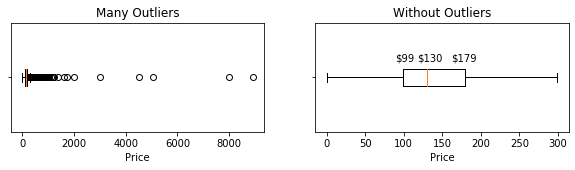

In [55]:
# showing top 2.5% of price data
# values greater than $433 per night
print("\nPrice Data\n---------------------")
print(df['price'].describe())

fig, ax = plt.subplots(1,2,figsize=(10,2))
ax[0].boxplot(df['price'], showfliers=True, vert=False)
ax[0].set_title("Many Outliers")
ax[0].set_xlabel("Price")
ax[0].set_yticklabels("")

ax[1].boxplot(df['price'], showfliers=False, vert=False)
ax[1].set_title("Without Outliers")
ax[1].set_xlabel("Price")
ax[1].set_yticklabels("")
ax[1].annotate("${:.0f}".format(df['price'].quantile(0.25)), (df['price'].quantile(0.25)*.90,1.15))
ax[1].annotate("${:.0f}".format(df['price'].quantile(0.50)), (df['price'].quantile(0.50)*.90,1.15))
ax[1].annotate("${:.0f}".format(df['price'].quantile(0.75)), (df['price'].quantile(0.75)*.90,1.15))

plt.show()
# df['price'].plot(kind='box')

In [56]:
print(len(df))
print("Number of values at 99.7%+ percentile:",len(df.iloc[np.where(df['price'] > df['price'].mean() + (3 * df['price'].std()))]['price']))
print(df.drop(df.iloc[np.where(df['price'] > df['price'].mean() + (3 * df['price'].std()))].index)['price'].describe())
df = df.drop(df.iloc[np.where(df['price'] > df['price'].mean() + (3 * df['price'].std()))].index)
print("\nWe can also see some really small numbers, but since all small values are within 2 standard deviations, \nlet's just drop the 0 value.\n",df['price'].nsmallest(10))
df = df.drop(df.loc[df['price']==0].index)

17810
Number of values at 99.7%+ percentile: 122
count    17688.000000
mean       147.601990
std         75.689221
min          0.000000
25%         99.000000
50%        130.000000
75%        175.000000
max        569.000000
Name: price, dtype: float64

We can also see some really small numbers, but since all small values are within 2 standard deviations, 
let's just drop the 0 value.
 12535     0.0
3705      9.0
18612     9.0
18228    10.0
2290     12.0
19863    15.0
6041     19.0
4697     20.0
17097    20.0
18285    20.0
Name: price, dtype: float64


#### Below you can see the pricing is now skewed right.

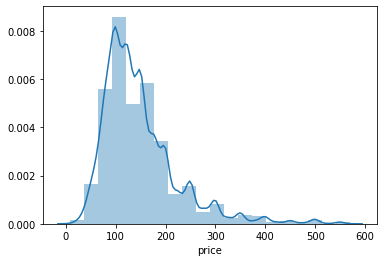

In [57]:
sns.distplot(df['price'], bins=20)

In [58]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.759677
Kurtosis: 4.445485


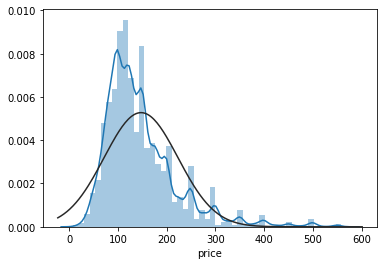

In [59]:
from scipy.stats import norm
sns.distplot(df['price'],fit=norm)

Price is not normally distributed. There is positive skewness and does not follow a diagonal line on the probability plot.

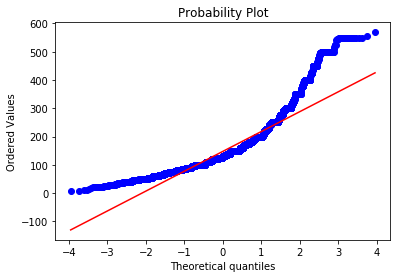

In [60]:
from scipy import stats

stats.probplot(df['price'], plot=plt)
plt.show()

Perhaps a log transform will do the trick.

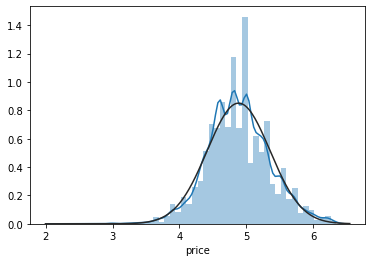

In [61]:
sns.distplot(df['price'].apply(np.log),fit=norm)

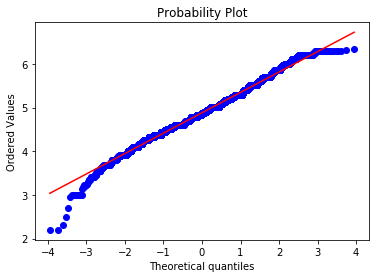

In [62]:
stats.probplot(df['price'].apply(np.log),plot=plt)
plt.show()

It's better. Obviously the tail ends are off, but they are over 3 theoretical quantiles distance.

### Let's apply the same technique with availability.


Availability_30 Data
---------------------
       availability_30  availability_60  availability_90  availability_365
count     17687.000000     17687.000000     17687.000000      17687.000000
mean          3.460451         7.037429        11.480070         52.361622
std           6.747502        13.526732        21.596294         96.717425
min           0.000000         0.000000         0.000000          0.000000
25%           0.000000         0.000000         0.000000          0.000000
50%           0.000000         0.000000         0.000000          1.000000
75%           4.000000         7.000000        11.000000         47.000000
max          30.000000        60.000000        90.000000        365.000000


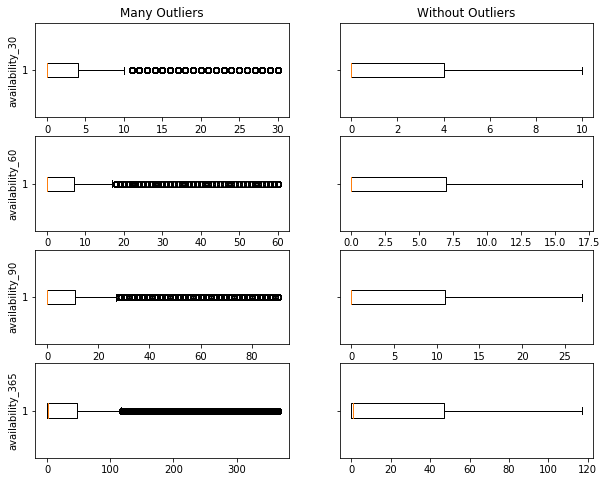

In [63]:
# showing top 2.5% of price data
# values greater than $433 per night
print("\nAvailability_30 Data\n---------------------")
print(df[['availability_30',"availability_60","availability_90","availability_365"]].describe())

fig, ax = plt.subplots(4,2,figsize=(10,8))
ax[0][0].boxplot(df['availability_30'], showfliers=True, vert=False)
ax[0][0].set_title("Many Outliers")
ax[0][0].set_xlabel("availability_30")
ax[0][0].set_ylabel("availability_30",rotation=90)

ax[0][1].boxplot(df['availability_30'], showfliers=False, vert=False)
ax[0][1].set_title("Without Outliers")
ax[0][1].set_xlabel("availability_30")
ax[0][1].set_yticklabels("")

ax[1][0].boxplot(df['availability_60'], showfliers=True, vert=False)
ax[1][0].set_xlabel("availability_60")
ax[1][0].set_ylabel("availability_60",rotation=90)

ax[1][1].boxplot(df['availability_60'], showfliers=False, vert=False)
ax[1][1].set_xlabel("availability_60")
ax[1][1].set_yticklabels("")

ax[2][0].boxplot(df['availability_90'], showfliers=True, vert=False)
ax[2][0].set_xlabel("availability_90")
ax[2][0].set_ylabel("availability_90",rotation=90)

ax[2][1].boxplot(df['availability_90'], showfliers=False, vert=False)
ax[2][1].set_xlabel("availability_90")
ax[2][1].set_yticklabels("")

ax[3][0].boxplot(df['availability_365'], showfliers=True, vert=False)
# ax[3][0].set_xlabel("availability_365")
ax[3][0].set_ylabel("availability_365",rotation=90)

ax[3][1].boxplot(df['availability_365'], showfliers=False, vert=False)
# ax[3][1].set_xlabel("availability_365")
ax[3][1].set_yticklabels("")

plt.show()
# df['price'].plot(kind='box')

### It's very interesting that 50% of the availability data is at 0 calendar days available. Likely means it's not a good feature to predict price.

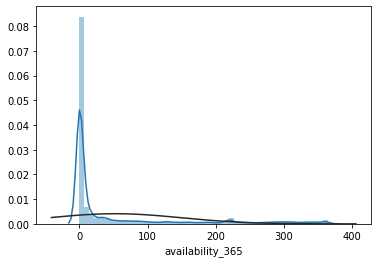

In [64]:
sns.distplot(df['availability_365'].apply(lambda x: np.log(x) if pd.isnull(x) else x),fit=norm)

In [65]:
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 1.904788
Kurtosis: 2.350282


That's highly skewed. Even with a log transform.

Below I'm saving a pairplot to .png because it's  hard to read. Basically, I chose to plot some columns against each other to visually inspect.

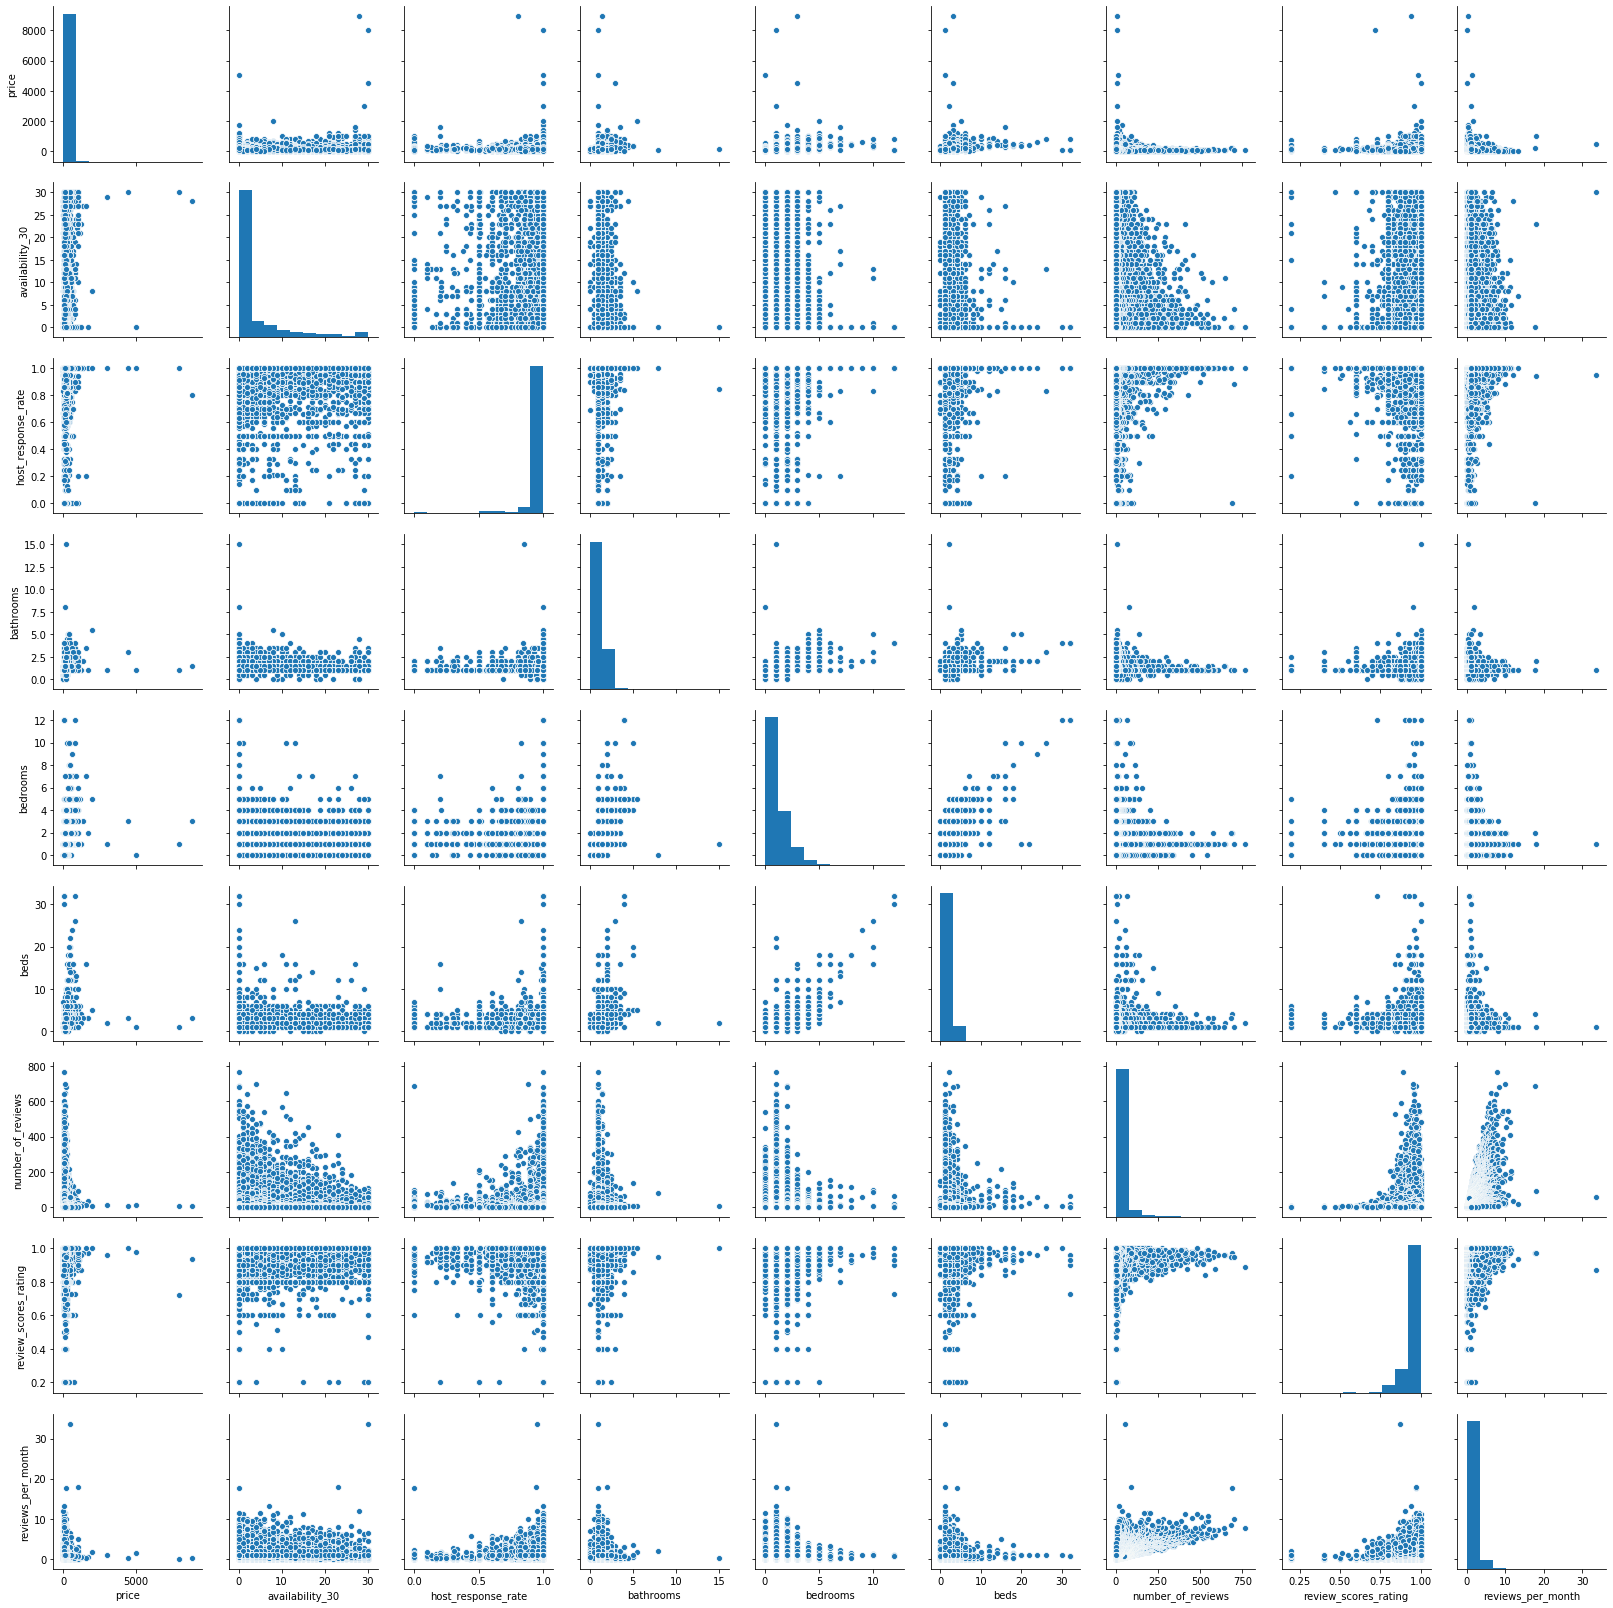

In [66]:
sns.pairplot(numerical[['price',
           'availability_30',
           'host_response_rate',
           'bathrooms',
           'bedrooms',
           'beds',
           'number_of_reviews',
           'review_scores_rating',
           'reviews_per_month']])
plt.savefig("pairplot.png")
# sns.pairplot(numerical)

### Above there are some correlations visible. Below you can see that mostly the similarly grouped columns have high correlations with each other.
### The values for these correlations are below the next plot.

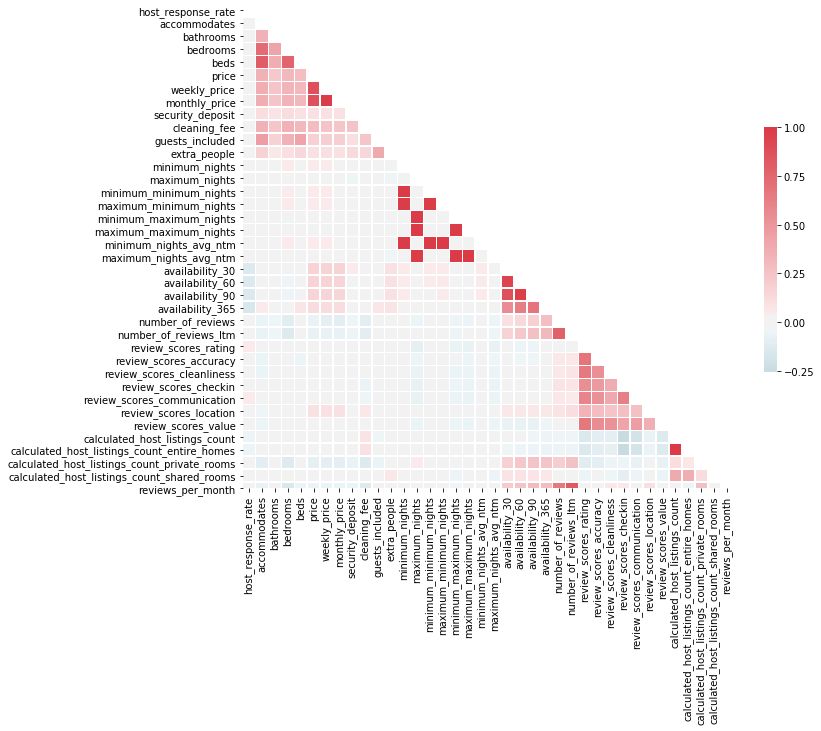

In [67]:
# Compute the correlation matrix
corr = numerical.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [68]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


Above you see many weak correlations between numerical figures. 

The strongest non-grouped correlations are between beds, bathrooms, and bedrooms with price. There's also a notable weak positive correlation between availability and number of reviews.

The review scores have positive correlations with each other as well.

In [69]:
# There are many hosts with many listings on the platform.
top_hosts = df.host_id.value_counts().head(10)
top_hosts

65859990     182
1464510      100
113977564     57
107745142     39
84453740      27
14183886      24
7594884       23
13405827      21
44168250      19
84449589      18
Name: host_id, dtype: int64

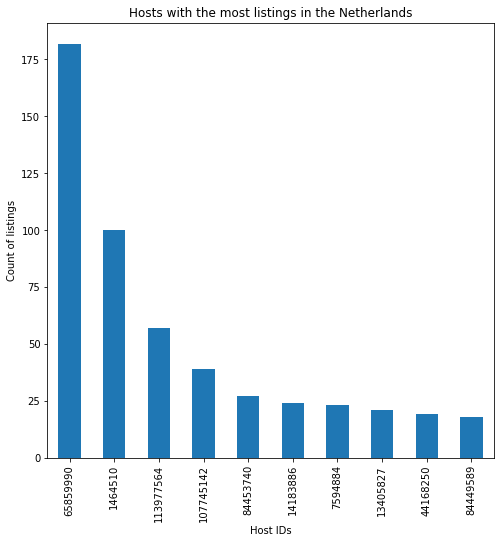

In [70]:
fig,ax = plt.subplots(figsize=(8,8))

top_hosts.plot(kind='bar')
plt.title("Hosts with the most listings in the Netherlands")
plt.ylabel("Count of listings")
plt.xlabel("Host IDs")
plt.show()

### Bathrooms Analysis
1. Below you will see that bathrooms gradually increase the price, and then beyond 3.5 bathrooms, the pricing is more random. 
2. At 3 bathrooms, there is a bimodal distribution.
3. The density of the groupings changes from lower prices to higher prices beyond 1.5 bathrooms.

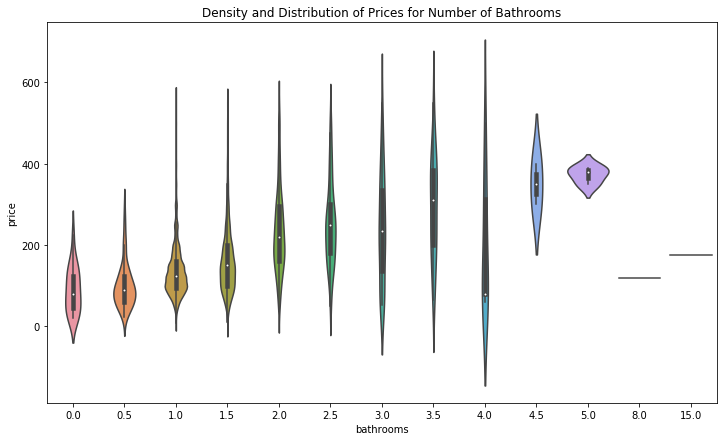

In [71]:
fig,ax = plt.subplots(figsize=(12,7))
ax = sns.violinplot(data=df, x='bathrooms',y='price')
ax.set_title("Density and Distribution of Prices for Number of Bathrooms")

plt.show()

### The following plot shows what I expect: a positive (+) correlation between the number of bedrooms and the price.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = np.array(df['bedrooms']).reshape(-1,1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("R^2 Value:\n",reg.score(X,y))
print("\nSlope:\n",reg.coef_[0])
print("\nMean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("\nY-intercept:\n",reg.intercept_)
print("\n",df.groupby('bedrooms').price.describe()[['mean','std']])



R^2 Value:
 0.22566452153102257

Slope:
 38.78730626262697

Mean Squared Error:
 4537.932681293232

Y-intercept:
 89.15625983142797

                 mean         std
bedrooms                        
0.0       113.221545   43.130851
1.0       122.221413   53.050491
2.0       184.798305   80.265324
3.0       213.356485   88.465242
4.0       246.022901  103.399177
5.0       301.625000  111.008200
6.0       434.625000   92.113187
7.0       328.000000  177.797638
8.0       456.666667   20.816660
10.0      381.333333   82.008130
12.0       80.000000    0.000000


It's obviously not a good predictor of price.
That Mean Squared Error is really large.
What is interesting is the not terrible R^2 value for 1 feature and at 0 Bedrooms, the expected price is about $89.

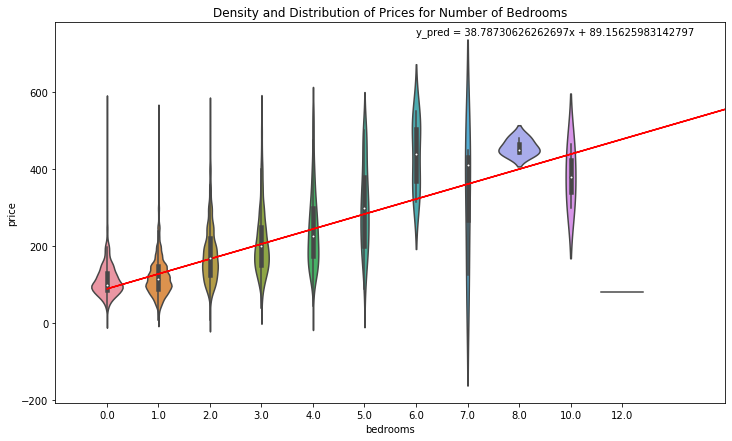

In [73]:
fig,ax = plt.subplots(figsize=(12,7))
ax = sns.violinplot(data=df, x='bedrooms',y='price')
ax.set_title("Density and Distribution of Prices for Number of Bedrooms")

ax.plot(X_test,y_pred,color='red')
ax.set_xlim(-1,12)
ax.annotate("y_pred = {}x + {}".format(reg.coef_[0],reg.intercept_),(6,750))


plt.show()

### Comparing the regression models for bedrooms vs. beds, we see a lower R^2, lower Slope, higher Error value, and higher y-intercept.
What can we conclude from this comparison?
1. The number of rooms drives the price more than the number of beds.
2. The number of beds, alone, is not a good predictor of price.
3. At 0 beds in a listing, this model predicts a price of $107.

In [74]:
X = np.array(df['beds']).reshape(-1,1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

reg = LinearRegression().fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("R^2 Value:\n",reg.score(X,y))
print("\nSlope:\n",reg.coef_[0])
print("\nMean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("\nY-intercept:\n",reg.intercept_)
print("\n",df.groupby('beds').price.describe()[['mean','std']])

R^2 Value:
 0.18142279987342314

Slope:
 20.565813163096102

Mean Squared Error:
 4775.19283142149

Y-intercept:
 107.26477030224748

             mean         std
beds                        
0.0   144.032258   66.816906
1.0   118.966166   49.289451
2.0   165.358722   76.904279
3.0   193.061087   87.773275
4.0   207.338091   85.014026
5.0   234.645161   96.230873
6.0   257.533708  115.666194
7.0   253.807692  103.367701
8.0   279.695652  121.603467
9.0   318.500000   68.743485
10.0  287.000000   84.154620
12.0  393.857143   94.119478
14.0  450.000000         NaN
15.0  425.000000         NaN
16.0  431.500000   79.959365
18.0  451.666667   54.833080
20.0  437.500000   81.317280
22.0  447.000000         NaN
30.0   80.000000         NaN
32.0   80.000000    0.000000


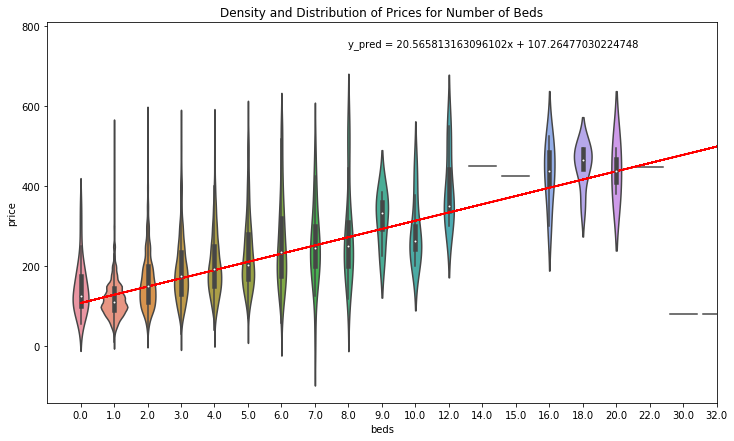

In [75]:
fig,ax = plt.subplots(figsize=(12,7))
ax = sns.violinplot(data=df, x='beds',y='price')
ax.set_title("Density and Distribution of Prices for Number of Beds")

ax.plot(X_test,y_pred,color='red')
ax.set_xlim(-1,19)
ax.annotate("y_pred = {}x + {}".format(reg.coef_[0],reg.intercept_),(8,750))


plt.show()

### Earlier I was interested in the positive correlation between availability and reviews. Here I see that there's a weak positive correlation between 'reviews_per_month' and availability and 'number_of_reviews' and availability.

In [76]:
df[[col for col in df.columns if ('review' in col) | ("availability" in col)]].drop(["first_review","last_review","reviews"],axis=1).corr().iloc[4:,:4]

,availability_30,availability_60,availability_90,availability_365
number_of_reviews,0.106777,0.145691,0.191508,0.283419
number_of_reviews_ltm,0.176164,0.229089,0.282865,0.310098
review_scores_rating,-0.037845,-0.047739,-0.049019,-0.027151
review_scores_accuracy,-0.030847,-0.038562,-0.038174,-0.017371
review_scores_cleanliness,-0.010261,-0.009209,-0.005845,0.016777
review_scores_checkin,0.012579,0.011855,0.016626,0.032272
review_scores_communication,-0.015454,-0.023494,-0.023848,-0.002239
review_scores_location,0.056259,0.056771,0.060742,0.065827
review_scores_value,-0.060114,-0.068073,-0.066915,-0.035447
reviews_per_month,0.208167,0.253537,0.297239,0.284546


### Now I'm interested to see where these listings are located. Let's perform a K-means algorithm on the Latitude and Longitude, then plot the clusters on a map.

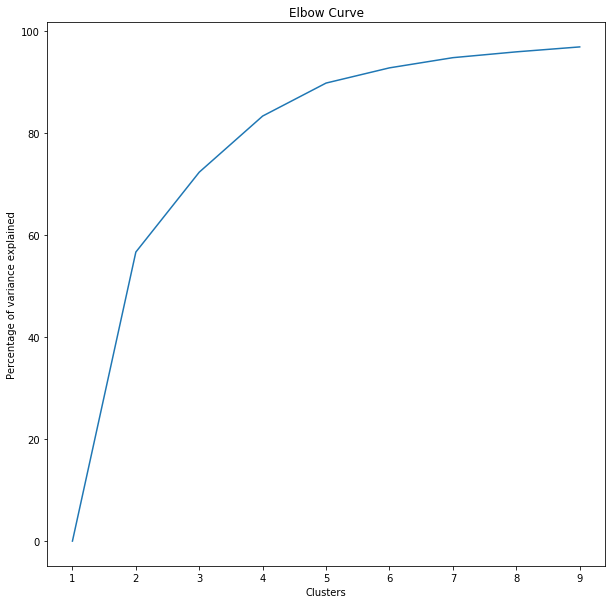

In [77]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

Y_axis = np.array(df['latitude']).reshape(-1,1)
X_axis = np.array(df['longitude']).reshape(-1,1)

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i).fit(Y_axis) for i in K_clusters]

centroids = [k.cluster_centers_ for k in kmeans]

Distance_k = [cdist(Y_axis, centroid, 'euclidean') for centroid in centroids]
dist = [np.min(D, axis=1) for D in Distance_k]

wcss = [sum(d**2) for d in dist]
total_sum_square = sum(pdist(Y_axis)**2)/Y_axis.shape[0]
bss = total_sum_square - wcss

# score = [kmeans[i].fit(Y_axis) for i in range(len(kmeans))]

fig,ax = plt.subplots(figsize=(10,10))
# ax.scatter(x=df['latitude'],y=df['longitude'])
ax.plot(K_clusters, bss/total_sum_square*100)
ax.set_title("Elbow Curve")
ax.set_xlabel("Clusters")
ax.set_ylabel("Percentage of variance explained")
plt.show()


The Percentage of Variance Explained heuristic tapers off at 5 clusters. Let's choose that number of means.

Centroids:
 [[52.3701945   4.93257358]
 [52.37853422  4.88230829]
 [52.35436684  4.89990482]
 [52.33739769  4.98485408]
 [52.36449225  4.85153258]]


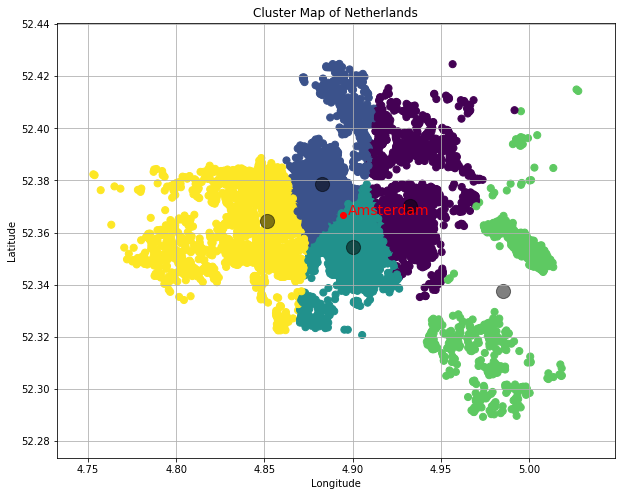

In [78]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_axis)

df['cluster_label'] = kmeans.fit_predict(df[['latitude','longitude']])

centers = kmeans.cluster_centers_

labels = kmeans.predict(df[['latitude','longitude']])

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x=df['longitude'],y=df['latitude'],cmap='viridis',c=labels,s=50)
ax.scatter(centers[:,1],centers[:,0],c='black',s=200,alpha=0.5)

# plot the clusters over a real looking map
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Cluster Map of Netherlands")
ax.grid(True)
ax.annotate("Amsterdam",(4.897,52.3667),c='red',fontsize=14)
ax.plot(4.8945,52.3667,'ro')
# ax.annotate("Rotterdam",(4.4777,51.9244))
# ax.annotate("The Hague",(4.3007,52.0705))
print("Centroids:\n",centers)
plt.show()

In [79]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def sentiment_calc(text):
    try:
        return sid.polarity_scores(text)
    except:
        pass

This next cell will take a long time to process. 
I'm going to use the polarity scores in PCA decomposition. 
I'm going to start making my model pipeline.

In [80]:
for col in df[descriptions.columns].columns:
    df[col+'_pos'] = df[col].apply(lambda x: sentiment_calc(x)['pos'] if pd.notnull(x) else x)
    df[col+'_neg'] = df[col].apply(lambda x: sentiment_calc(x)['neg'] if pd.notnull(x) else x)
    df[col+'_neu'] = df[col].apply(lambda x: sentiment_calc(x)['neu'] if pd.notnull(x) else x)
    df[col+'_compound'] = df[col].apply(lambda x: sentiment_calc(x)['compound'] if pd.notnull(x) else x)


In [81]:
# after adding columns, remember to update the relevant df partition
numerical = df[df.drop(df[['latitude','longitude','id','scrape_id','host_id']],axis=1).select_dtypes(include=['float','int64']).columns]

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

price_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), list(boolean.columns)),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')), list(categorical.columns)),
    (make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()),list(numerical.drop(['price','weekly_price','monthly_price'],axis=1).columns)),
    remainder='passthrough'
)

In [83]:
price_trans.fit_transform(df)

array([[0.0, 1.0, 0.0, ..., Timestamp('2009-03-30 00:00:00'),
        Timestamp('2019-08-05 00:00:00'), 0],
       [1.0, 0.0, 0.0, ..., Timestamp('2010-03-02 00:00:00'),
        Timestamp('2019-07-26 00:00:00'), 2],
       [1.0, 0.0, 0.0, ..., Timestamp('2018-01-21 00:00:00'),
        Timestamp('2019-05-11 00:00:00'), 1],
       ...,
       [1.0, 0.0, 0.0, ..., Timestamp('2019-08-04 00:00:00'),
        Timestamp('2019-08-04 00:00:00'), 4],
       [1.0, 0.0, 0.0, ..., Timestamp('2019-08-03 00:00:00'),
        Timestamp('2019-08-03 00:00:00'), 1],
       [1.0, 0.0, 0.0, ..., Timestamp('2019-08-04 00:00:00'),
        Timestamp('2019-08-04 00:00:00'), 4]], dtype=object)

In [84]:
pipe = make_pipeline(price_trans,LinearRegression())

### This pipeline clearly needs some tuning. The mean_squared_error is abyssmal.
### PCA is next. 

In [85]:
from sklearn.model_selection import cross_val_score

X = df[numerical.columns | boolean.columns | categorical.columns].drop(['price','weekly_price','monthly_price'],axis=1)
y = df.price
cross_val_score(pipe,X,y,cv=5,scoring='neg_mean_squared_error')

array([-9.72144805e+23, -1.28844550e+22, -3.16975196e+23, -4.14038744e+22,
       -2.25298069e+24])

In [86]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

pca = PCA()

Text(0.5, 1.0, 'Number of Components needed to Explain Variance on Price')

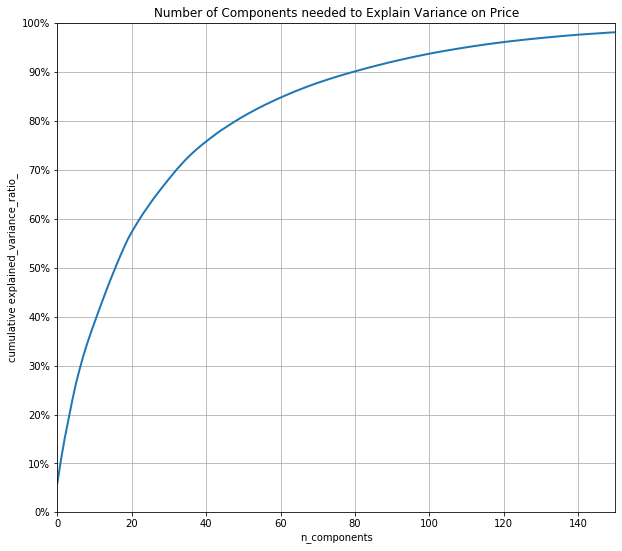

In [87]:
X = df[numerical.columns | boolean.columns | categorical.columns].drop(['price','weekly_price','monthly_price'],axis=1)
# print(len(X.columns))
y = np.array(df['price']).reshape(-1,1)

pipe = make_pipeline(price_trans,pca)

pipe.fit_transform(X,y)

fig,ax = plt.subplots(1,figsize=(10,9))
ax.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax.set_xlabel('n_components')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_yticklabels(["{:.0f}%".format(x) for x in np.arange(0,110,10)])
ax.set_ylabel('cumulative explained_variance_ratio_')
ax.set_xlim(0,150)
ax.set_ylim(0,1)
ax.grid(True)
ax.set_title("Number of Components needed to Explain Variance on Price")

# Dates
# Boolean (True/False)
# Categorical
# Location-oriented
# Descriptions

### Above we can see that 80+ components account for over 90% of the variance. This leads us to believe that using around 80 to 100 components, we would recover most of the essential characteristics of the data.

### Let's try this technique for availability as well.

In [88]:
availability_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), list(boolean.columns)),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(handle_unknown='ignore')), list(categorical.columns)),
    (make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()),list(numerical.columns)),#.drop(['availability_30','availability_60','availability_90','availability_365','weekly_price','monthly_price'],axis=1).columns)),
    remainder='passthrough'
)

Text(0.5, 1.0, 'Number of Components needed to Explain Variance for Monthly Availability')

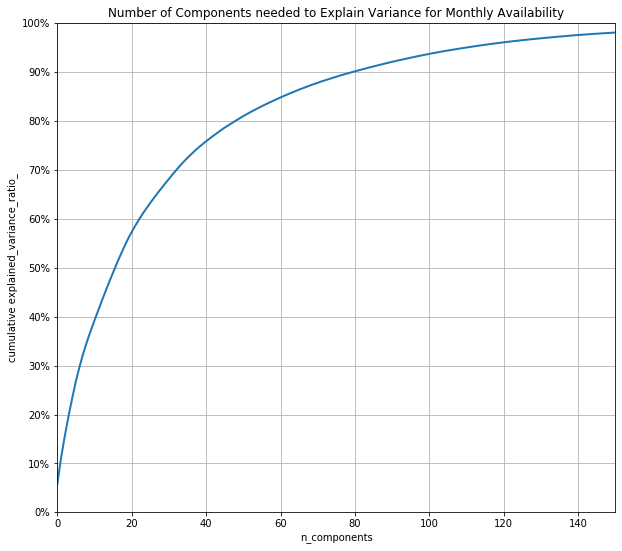

In [89]:
X = df[numerical.columns | boolean.columns | categorical.columns]#.drop(['availability_30','availability_60','availability_90','availability_365','weekly_price','monthly_price'])
# print(len(X.columns))
y = np.array(df['availability_30']).reshape(-1,1)

pipe = make_pipeline(availability_trans,pca)

pipe.fit_transform(X,y)

fig,ax = plt.subplots(1,figsize=(10,9))
ax.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax.set_xlabel('n_components')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_yticklabels(["{:.0f}%".format(x) for x in np.arange(0,110,10)])
ax.set_ylabel('cumulative explained_variance_ratio_')
ax.set_xlim(0,150)
ax.set_ylim(0,1)
ax.grid(True)
ax.set_title("Number of Components needed to Explain Variance for Monthly Availability")

### Above we can see that 80+ components account for over 90% of the variance as well. 
### Below, the same results occur.

Text(0.5, 1.0, 'Number of Components needed to Explain Variance for 2 Months Availability')

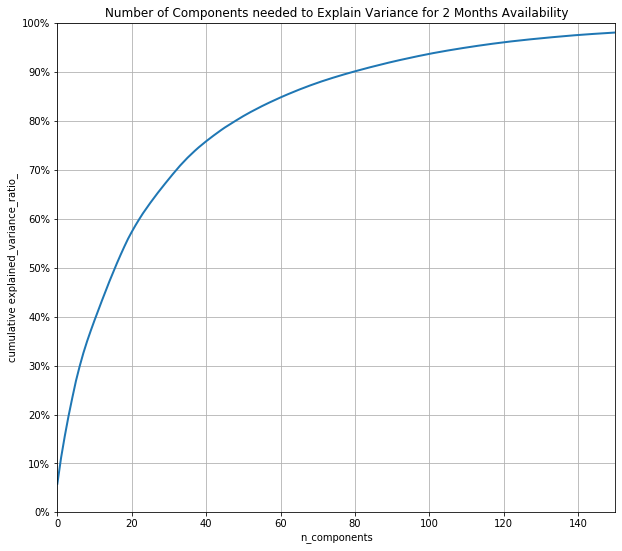

In [90]:
X = df[numerical.columns | boolean.columns | categorical.columns]#.drop(['availability_30','availability_60','availability_90','availability_365','weekly_price','monthly_price'])
# print(len(X.columns))
y = np.array(df['availability_60']).reshape(-1,1)

pipe = make_pipeline(availability_trans,pca)

pipe.fit_transform(X,y)

fig,ax = plt.subplots(1,figsize=(10,9))
ax.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax.set_xlabel('n_components')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_yticklabels(["{:.0f}%".format(x) for x in np.arange(0,110,10)])
ax.set_ylabel('cumulative explained_variance_ratio_')
ax.set_xlim(0,150)
ax.set_ylim(0,1)
ax.grid(True)
ax.set_title("Number of Components needed to Explain Variance for 2 Months Availability")

Text(0.5, 1.0, 'Number of Components needed to Explain Variance for 3 Months Availability')

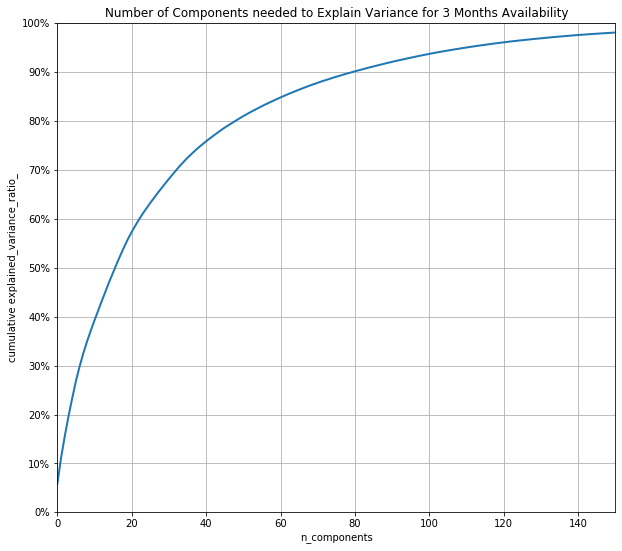

In [91]:
X = df[numerical.columns | boolean.columns | categorical.columns]#.drop(['availability_30','availability_60','availability_90','availability_365','weekly_price','monthly_price'])
# print(len(X.columns))
y = np.array(df['availability_90']).reshape(-1,1)

pipe = make_pipeline(availability_trans,pca)

pipe.fit_transform(X,y)

fig,ax = plt.subplots(1,figsize=(10,9))
ax.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax.set_xlabel('n_components')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_yticklabels(["{:.0f}%".format(x) for x in np.arange(0,110,10)])
ax.set_ylabel('cumulative explained_variance_ratio_')
ax.set_xlim(0,150)
ax.set_ylim(0,1)
ax.grid(True)
ax.set_title("Number of Components needed to Explain Variance for 3 Months Availability")

Text(0.5, 1.0, 'Number of Components needed to Explain Variance for Yearly Availability')

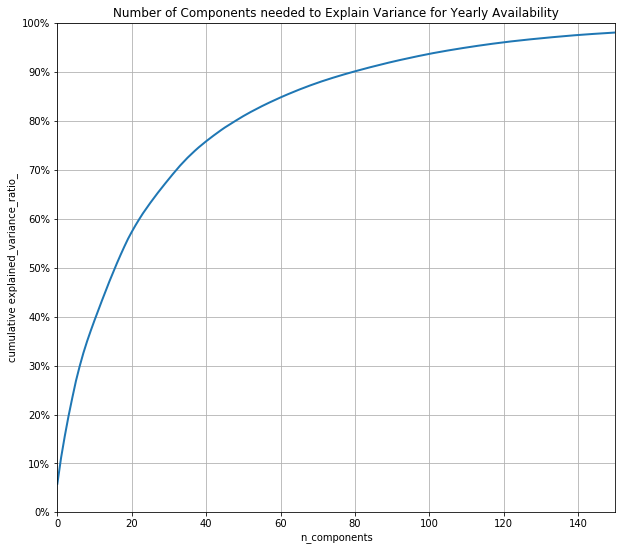

In [92]:
X = df[numerical.columns | boolean.columns | categorical.columns]#.drop(['availability_30','availability_60','availability_90','availability_365','weekly_price','monthly_price'])
# print(len(X.columns))
y = np.array(df['availability_365']).reshape(-1,1)

pipe = make_pipeline(availability_trans,pca)

pipe.fit_transform(X,y)

fig,ax = plt.subplots(1,figsize=(10,9))
ax.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
ax.set_xlabel('n_components')
ax.set_yticks(np.arange(0,1.1,0.1))
ax.set_yticklabels(["{:.0f}%".format(x) for x in np.arange(0,110,10)])
ax.set_ylabel('cumulative explained_variance_ratio_')
ax.set_xlim(0,150)
ax.set_ylim(0,1)
ax.grid(True)
ax.set_title("Number of Components needed to Explain Variance for Yearly Availability")

In [101]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(criterion='mse',  max_depth=15)

X = df[numerical.columns | boolean.columns | categorical.columns].drop(['price','weekly_price','monthly_price'],axis=1)
# print(len(X.columns))
y = np.array(df['price']).reshape(-1,1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state = 0)

pipe = make_pipeline(price_trans,dtree)
pipe.fit(train_X,train_y)

score = pipe.score(val_X,val_y)
print(score)
cross_val_score(pipe, val_X, val_y, cv=5)

0.18022114803220735


array([ 0.06740208,  0.06471481, -0.03032705,  0.13187383, -0.06614222])

I'm consistently getting above 15% R^2 with max_depth=15.

## All in all, I think I would make a good junior Data Scientist.
## I feel I should remind the reader that I majored in Economics.
## I learned all of this on my own with the exception of the 12-week Columbia Data Science bootcamp in 2019. I believe I could do a lot more with the proper resources and training.
## I appreciate the opportunity to provide this analysis. 